## Import Packages & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', parse_dates=['date'], infer_datetime_format=True, decimal=',')
features = df.columns.tolist()

In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
df.shape

(737453, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

**Comments**:
- The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. 
- From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality.) 
- The last two columns are the final iron ore pulp quality measurement from the lab.
- Target is to predict the last column, which is the % of silica in the iron ore concentrate.


## Data Pre-Processing & EDA

In [6]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data[missing_data['Total']!=0])

,Total,Percent


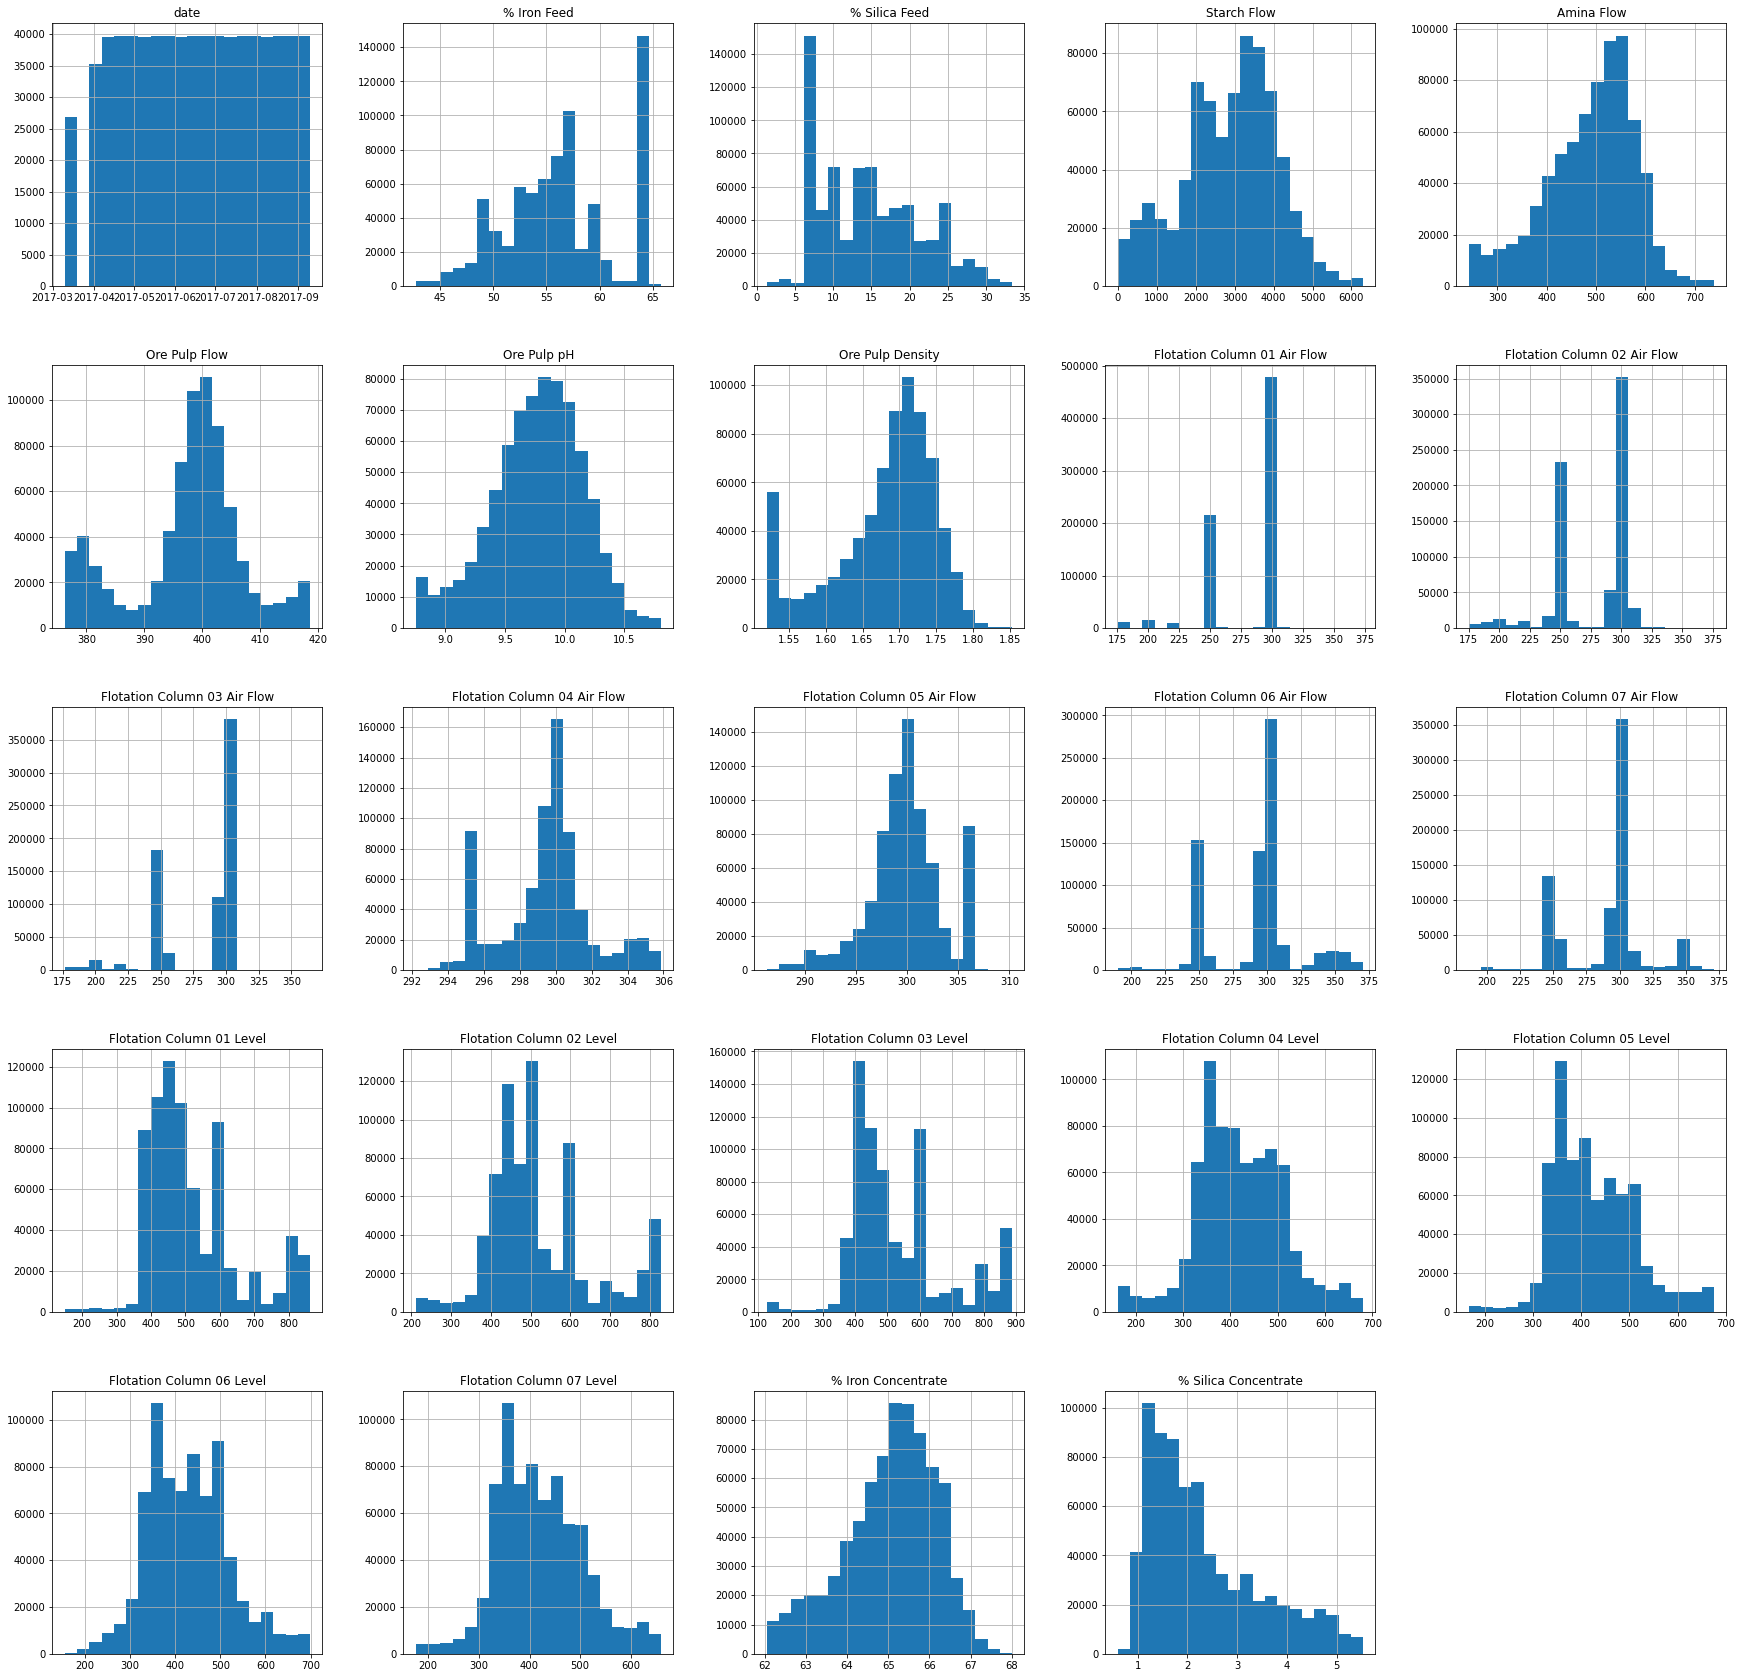

In [7]:
#look at distribution of df
hist = df.hist(figsize=(30,30),bins=20)

In [8]:
df.groupby(by='date').size()

date
2017-03-10 01:00:00    174
2017-03-10 02:00:00    180
2017-03-10 03:00:00    180
2017-03-10 04:00:00    180
2017-03-10 05:00:00    180
                      ... 
2017-09-09 19:00:00    180
2017-09-09 20:00:00    180
2017-09-09 21:00:00    180
2017-09-09 22:00:00    180
2017-09-09 23:00:00    180
Length: 4097, dtype: int64

**Comments:**
- Columns 1,2,22,23 are measured every hour
- The rest of the columns are measured every 20 seconds 

In [9]:
# resample the dataset so all 20 second columns are averaged out and each data entry is hourly

df2 = df.groupby(by='date').mean().reset_index()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4097 non-null   datetime64[ns]
 1   % Iron Feed                   4097 non-null   float64       
 2   % Silica Feed                 4097 non-null   float64       
 3   Starch Flow                   4097 non-null   float64       
 4   Amina Flow                    4097 non-null   float64       
 5   Ore Pulp Flow                 4097 non-null   float64       
 6   Ore Pulp pH                   4097 non-null   float64       
 7   Ore Pulp Density              4097 non-null   float64       
 8   Flotation Column 01 Air Flow  4097 non-null   float64       
 9   Flotation Column 02 Air Flow  4097 non-null   float64       
 10  Flotation Column 03 Air Flow  4097 non-null   float64       
 11  Flotation Column 04 Air Flow  

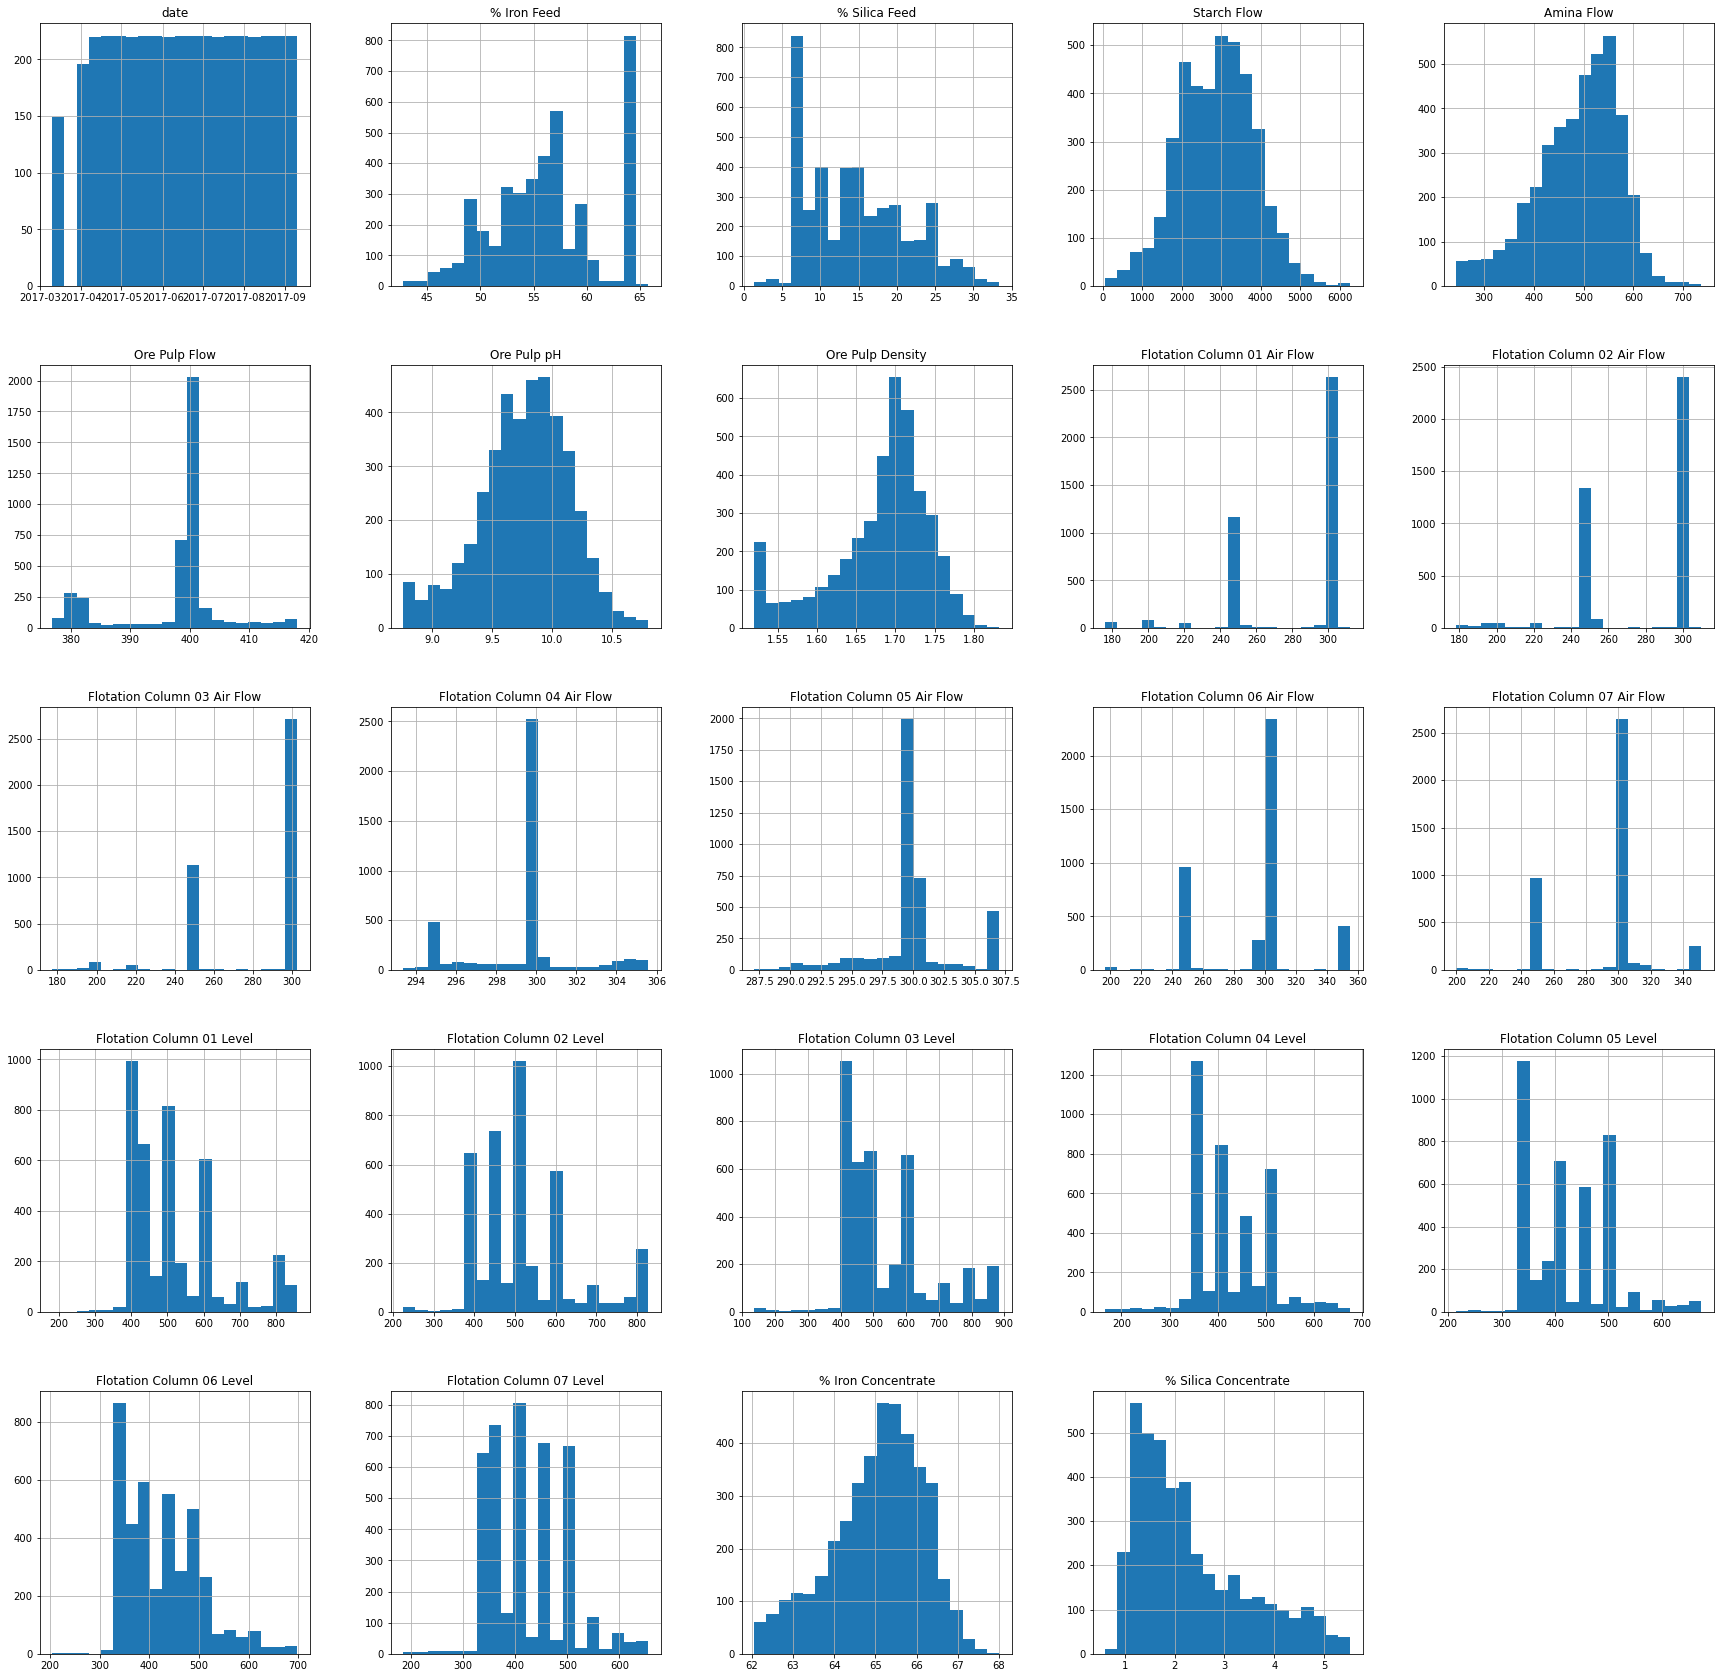

In [11]:
#look at distribution of df2
hist = df2.hist(figsize=(30,30),bins=20)

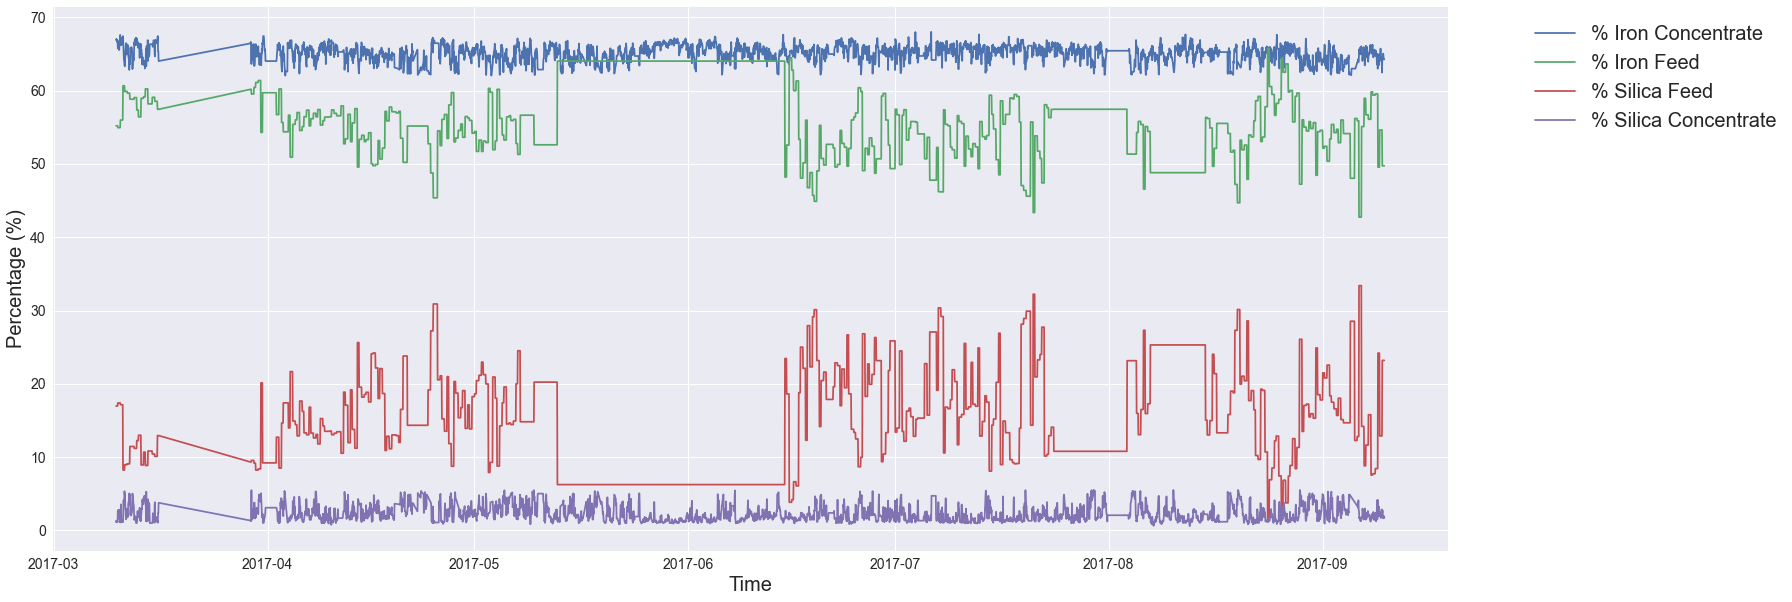

In [12]:
# Create figure and plot space
plt.style.use('seaborn')
fig, axes = plt.subplots(figsize=(25,10))

# Add x-axis and y-axis

axes.plot(
    df2['date'],
    df2['% Iron Concentrate'],
    label= '% Iron Concentrate'
)

axes.plot(
    df2['date'],
    df2['% Iron Feed'],
    label= '% Iron Feed'
)

axes.plot(
    df2['date'],
    df2['% Silica Feed'],
    label= '% Silica Feed'    
)

axes.plot(
    df2['date'],
    df2['% Silica Concentrate'],
    label= '% Silica Concentrate'
)

# Set title and labels for axes
axes.set(
    xlabel='Time',
    ylabel='Percentage (%)'
)

axes.legend(loc='upper left',bbox_to_anchor=(1.05, 1), prop={'size': 20}) #No overlapping plot elements

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

plt.show()

## Baseline model with Regression 

### A) Predicting Iron Concentrate 

Train R2 Score: 0.155
MAE Score: 0.824
MSE Score: 1.086
Test R2 Score: 0.168


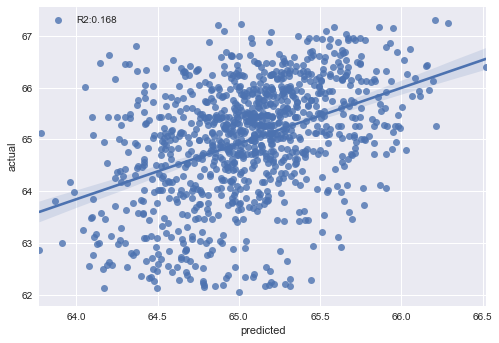


Most Important Features:


,features,Coefficient
6,Ore Pulp Density,3.063679
5,Ore Pulp pH,0.451809
10,Flotation Column 04 Air Flow,-0.037709
11,Flotation Column 05 Air Flow,0.035079
0,% Iron Feed,0.026284


In [13]:
#creating baseline model to predict iron concentrate & silica concentrate
X = df2.iloc[:,1:22]
Y = df2['% Iron Concentrate']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Baseline Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make graph to compare R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})
print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.161
MAE Score: 0.816
MSE Score: 1.069
Test R2 Score: 0.189


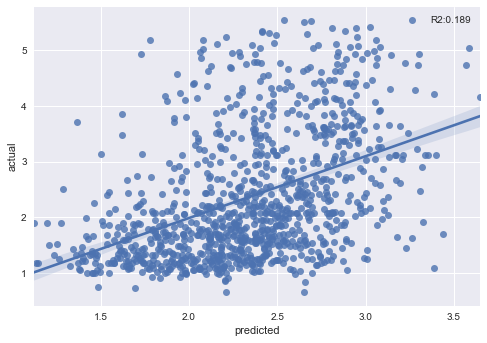


Most Important Features:


,features,Coefficient
6,Ore Pulp Density,-1.980995
5,Ore Pulp pH,-0.281741
10,Flotation Column 04 Air Flow,0.034701
1,% Silica Feed,0.013538
11,Flotation Column 05 Air Flow,-0.012752


In [14]:
#creating baseline model to predict iron concentrate & silica concentrate
X = df2.iloc[:,1:22]
Y = df2['% Silica Concentrate']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Baseline Model Silica Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})

print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

# Normalize Data 

In [36]:
df2 = df.groupby(by='date').mean().reset_index()

#feature enginnering
df2['total airflow'] = df2.iloc[:,7:14].sum(axis=1)
df2['total level'] = df2.iloc[:,14:21].sum(axis=1)
df2.drop(columns='date',inplace = True)

# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer()
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate', 'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate','total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([df2_pt,df2_ss], axis=1)

## Optimized model

### A) Predicting Iron Concentrate 

Optimized Model Iron Concentrate
Train R2 Score: 0.154
MAE Score: 0.736
MSE Score: 0.872
Test R2 Score: 0.165


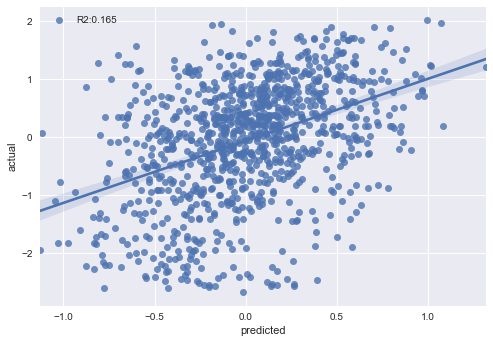


Most Important Features:


,features,Coefficient
22,total airflow,1.196530e+12
13,Flotation Column 06 Air Flow,-3.309442e+11
9,Flotation Column 02 Air Flow,-3.289847e+11
8,Flotation Column 01 Air Flow,-3.288361e+11
10,Flotation Column 03 Air Flow,-3.172465e+11


In [45]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Optimized Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})

print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

### B) Predicting Silica Concentrate 

Optimized Model Iron Concentrate
Train R2 Score: 0.171
MAE Score: 0.745
MSE Score: 0.82
Test R2 Score: 0.212


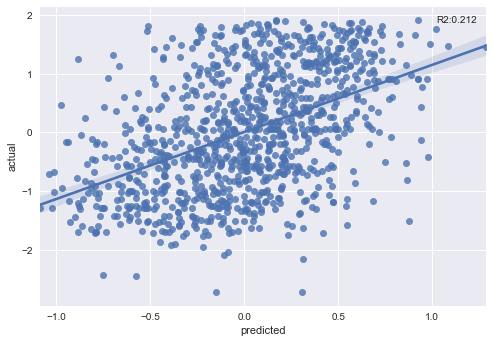


Most Important Features:


,features,Coefficient
22,total airflow,-4.487182e+12
13,Flotation Column 06 Air Flow,1.241094e+12
9,Flotation Column 02 Air Flow,1.233746e+12
8,Flotation Column 01 Air Flow,1.233189e+12
10,Flotation Column 03 Air Flow,1.189726e+12


In [48]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

#prints the model scores for your test dataset
print("Optimized Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
graph

sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})

print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)